In [1]:
with open('./input.txt','r',encoding='utf-8') as f:
    text = f.read()

In [2]:
print("lenght of dataser in characters:",len(text))

lenght of dataser in characters: 1115394


In [3]:
print(text[:1000])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us kill him, and we'll have corn at our own price.
Is't a verdict?

All:
No more talking on't; let it be done: away, away!

Second Citizen:
One word, good citizens.

First Citizen:
We are accounted poor citizens, the patricians good.
What authority surfeits on would relieve us: if they
would yield us but the superfluity, while it were
wholesome, we might guess they relieved us humanely;
but they think we are too dear: the leanness that
afflicts us, the object of our misery, is as an
inventory to particularise their abundance; our
sufferance is a gain to them Let us revenge this with
our pikes, ere we become rakes: for the gods know I
speak this in hunger for bread, not in thirst for revenge.



# CREATING CHARACTER VOCABULARY

In [4]:
#all unique characters that occur in the text
chars = sorted(list(set(text)))
vocab_size= len(chars)
print(''.join(chars))
print(vocab_size)


 !$&',-.3:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz
65


In [5]:
#TOKENIZATTTIOn
stoi = {ch:i for i, ch in enumerate(chars)}
itos = {i:ch for i, ch in enumerate(chars)}
encode = lambda s: [stoi[c] for c in s] #encoder: takes a string, outputs a list of inegers
decode = lambda l: ''.join([itos[i] for i in l])

print(encode("hii there"))#defines position in the character vocabulary
print(decode(encode("hii there")))

[46, 47, 47, 1, 58, 46, 43, 56, 43]
hii there


In [6]:
import torch
data = torch.tensor(encode(text), dtype=torch.long)
print(data.shape,data.dtype)
print(data[:1000]) #the 100 chracters we looked at earlier will to the GPT look like this

torch.Size([1115394]) torch.int64
tensor([18, 47, 56, 57, 58,  1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 14, 43, 44,
        53, 56, 43,  1, 61, 43,  1, 54, 56, 53, 41, 43, 43, 42,  1, 39, 52, 63,
         1, 44, 59, 56, 58, 46, 43, 56,  6,  1, 46, 43, 39, 56,  1, 51, 43,  1,
        57, 54, 43, 39, 49,  8,  0,  0, 13, 50, 50, 10,  0, 31, 54, 43, 39, 49,
         6,  1, 57, 54, 43, 39, 49,  8,  0,  0, 18, 47, 56, 57, 58,  1, 15, 47,
        58, 47, 64, 43, 52, 10,  0, 37, 53, 59,  1, 39, 56, 43,  1, 39, 50, 50,
         1, 56, 43, 57, 53, 50, 60, 43, 42,  1, 56, 39, 58, 46, 43, 56,  1, 58,
        53,  1, 42, 47, 43,  1, 58, 46, 39, 52,  1, 58, 53,  1, 44, 39, 51, 47,
        57, 46, 12,  0,  0, 13, 50, 50, 10,  0, 30, 43, 57, 53, 50, 60, 43, 42,
         8,  1, 56, 43, 57, 53, 50, 60, 43, 42,  8,  0,  0, 18, 47, 56, 57, 58,
         1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 18, 47, 56, 57, 58,  6,  1, 63,
        53, 59,  1, 49, 52, 53, 61,  1, 15, 39, 47, 59, 57,  1, 25, 39, 56, 41,
      

In [7]:
n=int(0.9*len(data))
train_data = data[:n] # first 90% is train, test
val_data = data[n:]

In [8]:
block_size = 8 #also called chunk size for loading no of characters at a time for training
train_data[:block_size+1]

tensor([18, 47, 56, 57, 58,  1, 15, 47, 58])

In [9]:
x = train_data[:block_size]
y = train_data[1:block_size+1] # y is the next word in the sequence so +1
for t in range(block_size):
    context = x[:t+1]
    target = y[t]
    print(f"when input is {context} the target: {target}")

when input is tensor([18]) the target: 47
when input is tensor([18, 47]) the target: 56
when input is tensor([18, 47, 56]) the target: 57
when input is tensor([18, 47, 56, 57]) the target: 58
when input is tensor([18, 47, 56, 57, 58]) the target: 1
when input is tensor([18, 47, 56, 57, 58,  1]) the target: 15
when input is tensor([18, 47, 56, 57, 58,  1, 15]) the target: 47
when input is tensor([18, 47, 56, 57, 58,  1, 15, 47]) the target: 58


In [10]:
torch.manual_seed(1337)
batch_size = 4 #how many independent sequences will we process in parallel?
block_size = 8 # what is the maximum context length for predictions?

def get_batch(split):
  #generate a small batch of data of inputs x and targets y
  data = train_data if split == 'train' else val_data
  ix = torch.randint(len(data)-block_size,(batch_size,))
  x = torch.stack([data[i:i+block_size] for i in ix])
  y = torch.stack([data[i+1:i+block_size+1] for i in ix])
  return x,y

xb,yb = get_batch('train')
print('inputs:')
print(xb.shape)
print(xb)
print('targets:')
print(yb.shape)
print(yb)

print('----')

for b in range(batch_size): #batch dimension
  for t in range(block_size): #time dimension
    context = xb[b,:t+1]
    target = yb[b,t]
    print(f"when input is {context.tolist()} the target: {target}")


inputs:
torch.Size([4, 8])
tensor([[24, 43, 58,  5, 57,  1, 46, 43],
        [44, 53, 56,  1, 58, 46, 39, 58],
        [52, 58,  1, 58, 46, 39, 58,  1],
        [25, 17, 27, 10,  0, 21,  1, 54]])
targets:
torch.Size([4, 8])
tensor([[43, 58,  5, 57,  1, 46, 43, 39],
        [53, 56,  1, 58, 46, 39, 58,  1],
        [58,  1, 58, 46, 39, 58,  1, 46],
        [17, 27, 10,  0, 21,  1, 54, 39]])
----
when input is [24] the target: 43
when input is [24, 43] the target: 58
when input is [24, 43, 58] the target: 5
when input is [24, 43, 58, 5] the target: 57
when input is [24, 43, 58, 5, 57] the target: 1
when input is [24, 43, 58, 5, 57, 1] the target: 46
when input is [24, 43, 58, 5, 57, 1, 46] the target: 43
when input is [24, 43, 58, 5, 57, 1, 46, 43] the target: 39
when input is [44] the target: 53
when input is [44, 53] the target: 56
when input is [44, 53, 56] the target: 1
when input is [44, 53, 56, 1] the target: 58
when input is [44, 53, 56, 1, 58] the target: 46
when input is [44, 53

In [11]:
import torch
import torch.nn as nn
from torch.nn import functional as F
torch.manual_seed(1337)

class BigramLanguageModel(nn.Module):
  def __init__(self, vocab_size):
    super().__init__()
    #each token directly reads off the logits for the next token from a lookup table
    self.token_embedding_table = nn.Embedding(vocab_size, vocab_size)

  def forward(self, idx, targets=None):
    #idx and targets are both (B,T) tensor of integers
    logits = self.token_embedding_table(idx) # (B,T,C)\
    if targets is None:
      loss = None
    else:
      B,T,C = logits.shape
      logits = logits.view(B*T,C)
      targets = targets.view(B*T)
      loss = F.cross_entropy(logits, targets)

    return logits, loss

  def generate(self, idx, max_new_tokens):
    #idx is (B,T) array of indices in the current context
    for _ in range(max_new_tokens):
      #get the predictions
      logits, loss = self(idx)
      #focus only on the last time step
      logits = logits[:, -1, :] #becomes (B,C)
      #apply softmax to get probabilities
      probs = F.softmax(logits, dim=-1) # (B,C)
      #sample from the distribution
      idx_next = torch.multinomial(probs, num_samples=1) # (B,1)
      idx = torch.cat((idx, idx_next), dim=1) # (B,T+1)
    return idx

m = BigramLanguageModel(vocab_size)
logits, loss = m(xb,yb)
print(logits.shape) # batch*block, characters(4*8,65)
print(loss) 


# idx=torch.zeros((1,1), dtype=torch.long) #for understanding only
print(decode(m.generate(idx=torch.zeros((1,1), dtype=torch.long), max_new_tokens=100)[0].tolist()))

torch.Size([32, 65])
tensor(4.8786, grad_fn=<NllLossBackward0>)

Sr?qP-QWktXoL&jLDJgOLVz'RIoDqHdhsV&vLLxatjscMpwLERSPyao.qfzs$Ys$zF-w,;eEkzxjgCKFChs!iWW.ObzDnxA Ms$3


## TRAINING THE BASE MODEL

In [12]:
#create a PyTorch optimizer
optimizer = torch.optim.AdamW(m.parameters(), lr=1e-3)

In [13]:
batch_size = 32
for steps in range(10000):
  #sample a batch of data
  xb,yb = get_batch('train')

  #evaluate the loss
  logits, loss = m(xb,yb)
  optimizer.zero_grad(set_to_none=True)
  loss.backward()
  optimizer.step()

print(loss.item())

2.5727508068084717


In [14]:
print(decode(m.generate(idx=torch.zeros((1,1), dtype=torch.long), max_new_tokens=300)[0].tolist()))


Iyoteng h hasbe pave pirance
Rie hicomyonthar's
Plinseard ith henoure wounonthioneir thondy, y heltieiengerofo'dsssit ey
KIN d pe wither vouprrouthercc.
hathe; d!
My hind tt hinig t ouchos tes; st yo hind wotte grotonear 'so it t jod weancotha:
h hay.JUCle n prids, r loncave w hollular s O:
HIs; ht 


# Mathematical trick in self attention

In [15]:
# consider the following toy example:
torch.manual_seed(1337)
B,T,C = 4,8,2 #batch, time, channels
x = torch.randn(B,T,C)
x.shape

torch.Size([4, 8, 2])

In [16]:
# We want x[b,t] = mean_{i<=t} x[b,i]
xbow = torch.zeros((B,T,C)) #bow is just bag of words
for b in range(B):
  for t in range(T):
    xprev = x[b,:t+1] # (t,C)
    xbow[b,t] = torch.mean(xprev, 0)

In [17]:
x[0]

tensor([[ 0.1808, -0.0700],
        [-0.3596, -0.9152],
        [ 0.6258,  0.0255],
        [ 0.9545,  0.0643],
        [ 0.3612,  1.1679],
        [-1.3499, -0.5102],
        [ 0.2360, -0.2398],
        [-0.9211,  1.5433]])

In [18]:
xbow[0]

tensor([[ 0.1808, -0.0700],
        [-0.0894, -0.4926],
        [ 0.1490, -0.3199],
        [ 0.3504, -0.2238],
        [ 0.3525,  0.0545],
        [ 0.0688, -0.0396],
        [ 0.0927, -0.0682],
        [-0.0341,  0.1332]])

In [23]:
torch.tril(torch.ones(3,3)) # this is how char tokens are masked in the attention mechanism

tensor([[1., 0., 0.],
        [1., 1., 0.],
        [1., 1., 1.]])

In [26]:
torch.manual_seed(42)
a=torch.tril(torch.ones(3,3))
a= a/torch.sum(a, dim=1, keepdim=True) #normalize the rows
b = torch.randint(0,10,(3,2)).float()
c = a @ b #matrix multiplication
print("a= ")
print(a)
print("b= ")
print(b)
print("c= ")
print(c)

a= 
tensor([[1.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000],
        [0.3333, 0.3333, 0.3333]])
b= 
tensor([[2., 7.],
        [6., 4.],
        [6., 5.]])
c= 
tensor([[2.0000, 7.0000],
        [4.0000, 5.5000],
        [4.6667, 5.3333]])


#### Version2: Normalizing the rows

In [ ]:
# version 2
wei = torch.tril(torch.ones(T,T)) #weights for the attention mechanism
wei = wei / wei.sum(dim=1, keepdim=True) #normalize the rows
xbow2 = wei @ x # (T,T) @ (B,T,C), as this is a batch operation the actual dimension made by pytorch will be
# (B,T,T) @ (B,T,C) ----> (B,T,C) size dimensions
torch.allclose(xbow, xbow2) #check if both are equal
# print(xbow2.shape)
# print(wei.shape)
# print(x.shape)


False

In [33]:
xbow[0], xbow2[0]

(tensor([[ 0.1808, -0.0700],
         [-0.0894, -0.4926],
         [ 0.1490, -0.3199],
         [ 0.3504, -0.2238],
         [ 0.3525,  0.0545],
         [ 0.0688, -0.0396],
         [ 0.0927, -0.0682],
         [-0.0341,  0.1332]]),
 tensor([[ 0.1808, -0.0700],
         [-0.0894, -0.4926],
         [ 0.1490, -0.3199],
         [ 0.3504, -0.2238],
         [ 0.3525,  0.0545],
         [ 0.0688, -0.0396],
         [ 0.0927, -0.0682],
         [-0.0341,  0.1332]]))

### Version 3: Using softmax for normalization

In [36]:
tril = torch.tril(torch.ones(3,3))
tril

tensor([[1., 0., 0.],
        [1., 1., 0.],
        [1., 1., 1.]])

In [39]:
wei = torch.zeros(T,T)
wei

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [40]:
wei = wei.masked_fill(tril == 0, float('-inf')) #mask the upper triangle with -inf
# we are masking the upper triangle to -inf so that the softmax will not consider the future tokens as -inf will be converted to 0 in the softmax
wei

tensor([[0., -inf, -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., 0., -inf, -inf, -inf],
        [0., 0., 0., 0., 0., 0., -inf, -inf],
        [0., 0., 0., 0., 0., 0., 0., -inf],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [41]:
wei = F.softmax(wei, dim=-1) #apply softmax to the weights
wei

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3333, 0.3333, 0.3333, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2500, 0.2500, 0.2500, 0.2500, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.0000, 0.0000, 0.0000],
        [0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.0000, 0.0000],
        [0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.0000],
        [0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250]])

In [37]:
# version 3:  Use softmax to produce xbow3
tril = torch.tril(torch.ones(T,T)) #weights for the attention mechanism
wei = torch.zeros(T,T) #weights for the attention mechanism
wei = wei.masked_fill(tril == 0, float('-inf')) #mask the upper triangle with -inf
wei = F.softmax(wei, dim=-1) #normalize the rows
xbow3 = wei @ x # (T,T) @ (B,T,C), as this is a batch operation the actual dimension made by pytorch will be
# (B,T,T) @ (B,T,C) ----> (B,T,C) size dimensions
torch.allclose(xbow, xbow3) #check if both are equal

False

### Version 4: SELF ATTENTION

In [56]:
torch.manual_seed(1337)
B,T,C = 4,8,32 #batch, time, channels
x = torch.randn(B,T,C)

# lets see a single head perform self-attention
head_size = 16
key = nn.Linear(C, head_size, bias=False) #key projection
query = nn.Linear(C, head_size, bias=False) #query projection
value = nn.Linear(C, head_size, bias=False) #value projection
k = key(x) # (B,T,C) -> (B,T,head_size)
q = query(x) # (B,T,C) -> (B,T,head_size)

wei = q @ k.transpose(-2, -1) # transpose the last two dimensions of k i.e t and head_size to perform dot product by matrix multiplication
# so # (B,T,head_size) @ (B,head_size,T) -> (B,T,T)


tril = torch.tril(torch.ones(T,T)) #weights for the attention mechanism
# wei = torch.zeros(T,T) #weights for the attention mechanism
wei = wei.masked_fill(tril == 0, float('-inf')) #mask the upper triangle with -inf
wei = F.softmax(wei, dim=-1) #normalize the rows

v = value(x) # (B,T,C) -> (B,T,head_size)
out = wei @ v # (T,T) @ (B,T,C), as this is a batch operation the actual dimension made by pytorch will be

out.shape # (B,T,C) size dimensions

torch.Size([4, 8, 16])

In [57]:
tril, wei[0]

(tensor([[1., 0., 0., 0., 0., 0., 0., 0.],
         [1., 1., 0., 0., 0., 0., 0., 0.],
         [1., 1., 1., 0., 0., 0., 0., 0.],
         [1., 1., 1., 1., 0., 0., 0., 0.],
         [1., 1., 1., 1., 1., 0., 0., 0.],
         [1., 1., 1., 1., 1., 1., 0., 0.],
         [1., 1., 1., 1., 1., 1., 1., 0.],
         [1., 1., 1., 1., 1., 1., 1., 1.]]),
 tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.1574, 0.8426, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.2088, 0.1646, 0.6266, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.5792, 0.1187, 0.1889, 0.1131, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0294, 0.1052, 0.0469, 0.0276, 0.7909, 0.0000, 0.0000, 0.0000],
         [0.0176, 0.2689, 0.0215, 0.0089, 0.6812, 0.0019, 0.0000, 0.0000],
         [0.1691, 0.4066, 0.0438, 0.0416, 0.1048, 0.2012, 0.0329, 0.0000],
         [0.0210, 0.0843, 0.0555, 0.2297, 0.0573, 0.0709, 0.2423, 0.2391]],
        grad_fn=<SelectBackward0>))

### Notes:

- Attention is a ***communication mechanism***. Can be seen as nodes in a directed graph looking at each other and aggregating information with a weighted sum from all nodes that point to them, with data-dependent weights.
- There is no notion of space. Attention simply acts over a set of vectors. This is why we need to positionally encode tokens.
- Each example across batch dimension is of course processed completely independently and never "talk" to each other
- In an "encoder" attention block just delete the single line that does masking with tril, allowing all tokens to communicate. This block here is called a "decoder" attention block because it has triangular masking, and is usually used in autoregressive settings, like language modeling.
- "self-attention" just means that the keys and values are produced from the same source as queries. In "cross-attention", the queries still get produced from x, but the keys and values come from some other, external source (e.g. an encoder module)
- "Scaled" attention additional divides wei by 1/sqrt(head_size). This makes it so when input Q,K are unit variance, wei will be unit variance too and Softmax will stay diffuse and not saturate too much. Illustration below

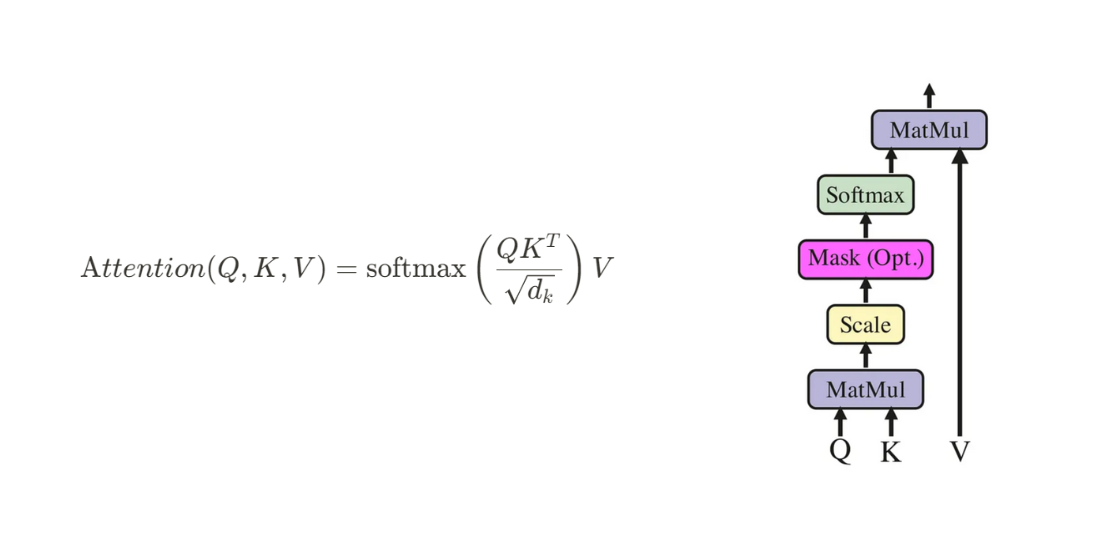

In [58]:
k = torch.randn(B,T,head_size)
q = torch.randn(B,T,head_size)
wei = q @ k.transpose(-2, -1) * head_size ** -0.5 # scale the dot product by the square root of the head size

In [59]:
k.var() # variance of the key vectors

tensor(1.0449)

In [60]:
q.var() # variance of the query vectors

tensor(1.0700)

In [ ]:
torch.softmax(torch.tensor([0.1, -0.2, 0.3, -0.2, 0.5]), dim=-1) # softmax of the logits
# the softmax is not much peaky here in the ouput

tensor([0.1925, 0.1426, 0.2351, 0.1426, 0.2872])

In [66]:
print(torch.softmax(torch.tensor([0.1, -0.2, 0.3, -0.2, 0.5])*8, dim=-1)) # softmax of the logits
print("Scaling factor (*head_size ** -0.5) is used to make the softmax more peaky or greater variancce")
# you will see that the softmax is more peaky when you scale the logits by a factor of 8

# so scaling fector (*head_size ** -0.5) is used to make the softmax more peaky and to avoid the vanishing gradient problem

tensor([0.0326, 0.0030, 0.1615, 0.0030, 0.8000])
Scaling factor (*head_size ** -0.5) is used to make the softmax more peaky or greater variancce


## BATCH NORMALIZATION

In [72]:
class BatchNorm1d:
    
    def __init__(self, dim, eps=1e-5, momentum=0.1):
        self.eps = eps
        self.momentum = momentum
        self.training = True
        # parameters (trained with backpropagation)
        self.gamma = torch.ones(dim)  # scale
        self.beta = torch.zeros(dim)
        # buffers (trained with a running 'momentum update')
        self.running_mean = torch.zeros(dim)
        self.running_var = torch.ones(dim)
        
    def __call__(self, x):
        #calculate the forward pass
        if self.training:
            xmean = x.mean(1, keepdim=True) # changed to 1 so we normlize the rows instead of columns
            xvar = x.var(1, keepdim=True)
        else:
            xmean = self.running_mean
            xvar = self.running_var
        xhat = (x - xmean) / torch.sqrt(xvar + self.eps) # normalize to unit variance
        self.out = self.gamma * xhat + self.beta # scale and shift
        
        #update the buffers
        if self.training:
            with torch.no_grad():
                self.running_mean = (1 - self.momentum) * self.running_mean + self.momentum * xmean
                self.running_var = (1 - self.momentum) * self.running_var + self.momentum * xvar
        return self.out
    
    def parameters(self):
        return [self.gamma, self.beta]
         
         
torch.manual_seed(1337)
module = BatchNorm1d(100)
x = torch.randn(32, 100)  # batch of 32 samples, each with 100 features   
x = module(x)  # forward pass
x.shape

torch.Size([32, 100])

# Layernormalization
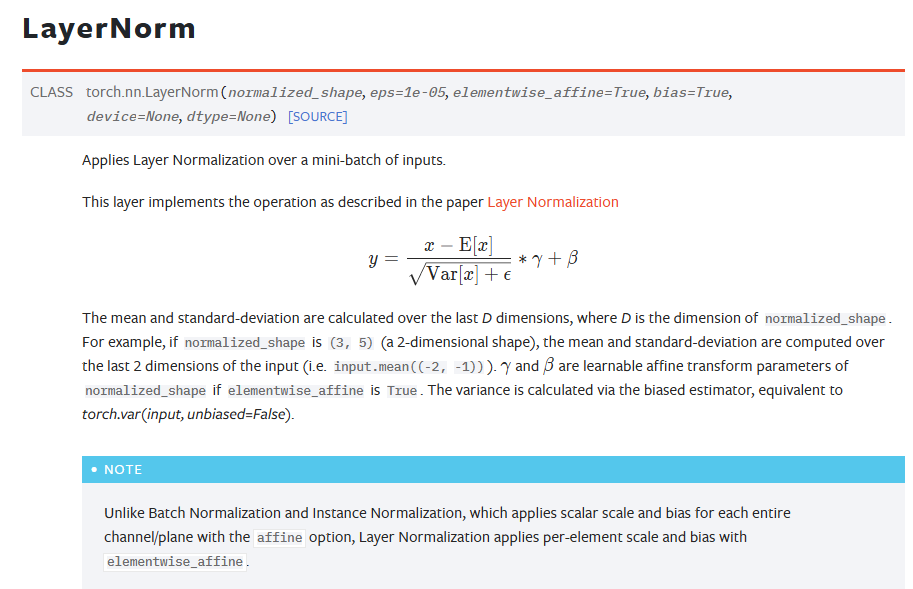

In [75]:
class BatchNorm1d:
    
    def __init__(self, dim, eps=1e-5, momentum=0.1):
        self.eps = eps
        # parameters (trained with backpropagation)
        self.gamma = torch.ones(dim)  # scale
        self.beta = torch.zeros(dim)

    def __call__(self, x):
        #calculate the forward pass
        xmean = x.mean(1, keepdim=True) # changed to 1 so we normlize the rows instead of columns
        xvar = x.var(1, keepdim=True)

        xhat = (x - xmean) / torch.sqrt(xvar + self.eps) # normalize to unit variance
        self.out = self.gamma * xhat + self.beta # scale and shift
        return self.out
    
    def parameters(self):
        return [self.gamma, self.beta]
         
         
torch.manual_seed(1337)
module = BatchNorm1d(100)
x = torch.randn(32, 100)  # batch of 32 samples, each with 100 features   
x = module(x)  # forward pass
x.shape

torch.Size([32, 100])

In [76]:
x[:,0].mean(), x[:,0].std() # mean, std of one feature in the batch

(tensor(0.1469), tensor(0.8803))

In [77]:
x[0,:].mean(), x[0,:].std() # mean, std of single input form the batch, of its features

(tensor(-9.5367e-09), tensor(1.0000))